# Implementing Advanced Regression  Techniques for Prediction:

There are several factors that impact the overall price of the house, some of those factors are more **tangible** as the quality of the house or the overall size (area) of the house and other factors are more **intrinsic** such as the performance of the economy. Coming with an accurate model that predicts with such precision the actual value is an arduous task since there are both internal and external factors that will affect the price of a single house. Nevertheless, what we can do is **detect** those features that carry a heavier weight on the overall output (Price of the house). <br><br>

Before the housing crisis that occurred during the years of (2007-2008), most people believed that the prices of houses tended to go up throughout the years and that people that invested into properties were certain that they will get a return. This was not the case since banks were basically approving loans to people that were not able to afford to pay a house, there were even financial institutions who were approving loans to ordinary individuals at a variable interest rate (meaning rate will change depending on the current market rate) and when the crisis occurred lots of those ordinary individuals were not able to afford to pay back their mortgages. Of course, there were other reasons that caused the financial crisis in the first place such as the introduction of complex financial instruments (*derivatives are still not widely understood*), hedging financial instruments (credit default swaps), and the deregulation of the financial industry as a whole. While we can argue about the factors that caused the financial crisis, the main objective of this post is to determine what possible features could have a real impact on the overall value of a house. We will try to answer questions such as to what extent did the recession impacted the value house prices? What materials were most commonly used with houses that had a high price range? (Rooftop, walls etc.) Which neighborhoods were the most exclusive? <br><br>

I believe that in order to perform an extensive analysis of this data we should explore our data, by this I mean getting a sense of what is the **story behind the data**. Most of the time I tend to reject the idea of just building a model that have a good accuracy score for predicting values instead, I analyze my data carefully (determining distributions, missing values, visualizations) in order to have a better understanding of what is going on. ONly after my extensive analysis I proceed to developing the predictive model, in this case we will use **regression models.** The downside of this to many of you who will see this post, is that it will be somewhat long, so if you think you should **skip** all the sections and start from the regression model step, please feel free to do so! I will create an outline so it will help you find the section you wish to start with. <br><br>

**I'd rather have a full house at a medium price than a half-full at a high price. - George Shinn**
***

## Goal of this Project:
***
### Achieving our goal is split into two phases: <br>
1) **Exploratory Data Analysis (EVA)**: In this phase our main aim is to have a better understanding of the features involved in our data. It might be possible that some are left behind but I will be focusing on the features that have the highest correlation towards SalePrice. <br><br>

2) **Advanced Regression**: We will implement Regression model to predict a possible SalePrice (label) of the house.

## Outline: 
***
I. **Understanding our Data**<br>
a) [Splitting into Different Categories](#splitting)<br>
b) [Gathering Basic Insight](#insight) <br><br>

II. **Economic Activity**<br><br>
III. [Outside Surroundings](#outside)<br>
a) [Type of Zoning](#zoning)<br>
b) [Neighborhoods](#neighborhoods) <br><br>

IV. **Areas of the House** <br>
a) [The Impact of Space towards Price](#space)<br><br>

V. **Building Characteristics**<br>
a) [Correlations with SalePrice](#correlation)<br>
b) [What garages tell about House Prices?](#garage)<br><br>

VI. **Miscellaneous and Utilities**<br>
a) [What determines the quality of the house?](#quality)<br>
b) [Intersting insights](#interesting)<br>
c) [Which Material Combination increased the Price of Houses?](#material)<br><br>

VII. [Quality of Neighborhoods](#quality_neighborhoods)<br><br>

VIII. **The Purpose of using Log Transformations** <br>
a)[Log Transformations](#log_transformations)<br>
b) [Skewedness and Kurtosis](#skew_kurt)<br>
c) [Outliers Analysis](#analysis_outliers)<br>
d) [Bivariate Analysis](#bivariate) <br><br>

IX. **Feature Engineering** <br>
a) [Dealing with Missing Values](#missing_values)<br>
b) [Transforming Values](#transforming_values)<br>
c) [Combining Attributes](#combining_atributes) <br>
d) [Dealing with numerical and categorical values](#num_cat_val) <br><br>

X. **Scaling** <br>
a) [Categorical Encoding Class](#categorical_class)<br>
b) [Combine Attribute Class](#combining)<br>
c) [Pipelines](#combining)<br><br>

XI. **Predictive Models** <br>
a) [Residual Plot](#residual_plot) <br>
b) [RandomForests Regressor](#random_forest) <br>
c) [GradientBoosting Regressor](#gradient_boosting)<br>
d) [Stacking Regressor](#stacking_regressor)

### References: 
1) <a href="https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard">Stacked Regressions : Top 4% on LeaderBoard</a> by Serigne.
- Good if you are looking for stacking models and to gather an in-depth analysis for feature engineering. <br><br>

2) <a href="https://www.kaggle.com/vhrique/simple-house-price-prediction-stacking"> Simple House Price Prediction Stacking </a> by Victor Henrique Alves Ribeiro.  
- Gave me an idea of which algorithms to implement in my ensemble methods. <br>
- Also Victor is really open to answer any doubts with regards to this project. <br><br>

3) <a href="https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python"> Comprehensive data exploration with Python </a> by Pedro Marcelino.
- Help me understand more in depth the different linear regularization methods and its parameters. <br><br>

4) <b> Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2017 Aurélien Géron   </b><br>
- Good reference for understanding how Pipelines work. <br>
- Good for understanding ensemble methods such as RandomForests and GradientBoosting. <br>
- This book is a must have for people starting in the area of machine learning.<br><br>


5) <a href="https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/"> A comprehensive beginners guide for Linear, Ridge and Lasso Regression </a> by Shubham Jain at Analytics Vidhya.
- Helped me implement a residual plot.. <br>
- Better understanding of Ridge, Lasso and ElasticNet (Good for Beginners).

In [1]:
# Data and plotting imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Plotly imports
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# Maintain the Ids for submission
train_id = train['Id']
test_id = test['Id']

In [2]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
# It seems we have nulls so we will use the imputer strategy later on.
Missing = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
Missing[Missing.sum(axis=1) > 0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,train,test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [4]:
# We have several columns that contains null values we should replace them with the median or mean those null values.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


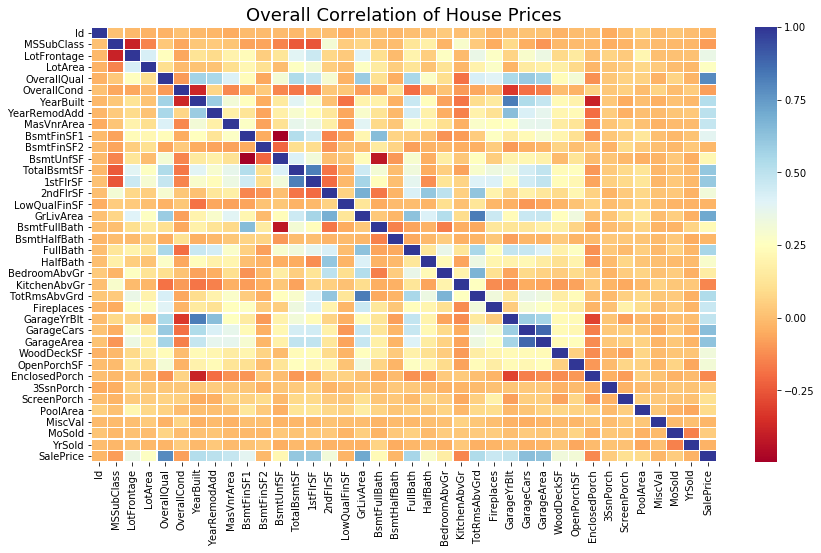

In [6]:
corr = train.corr()
plt.figure(figsize=(14,8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
plt.show()

In [7]:
# Create the categories
outsidesurr_df = train[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

building_df = train[['Id', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

utilities_df = train[['Id', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

ratings_df = train[['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

rooms_df = train[['Id', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]




# Set Id as index of the dataframe.
outsidesurr_df = outsidesurr_df.set_index('Id')
building_df = building_df.set_index('Id')
utilities_df = utilities_df.set_index('Id')
ratings_df = ratings_df.set_index('Id')
rooms_df = rooms_df.set_index('Id')

# Move SalePrice to the first column (Our Label)
sp0 = outsidesurr_df['SalePrice']
outsidesurr_df.drop(labels=['SalePrice'], axis=1, inplace=True)
outsidesurr_df.insert(0, 'SalePrice', sp0)

sp1 = building_df['SalePrice']
building_df.drop(labels=['SalePrice'], axis=1, inplace=True)
building_df.insert(0, 'SalePrice', sp1)

sp2 = utilities_df['SalePrice']
utilities_df.drop(labels=['SalePrice'], axis=1, inplace=True)
utilities_df.insert(0, 'SalePrice', sp2)

sp3 = ratings_df['SalePrice']
ratings_df.drop(labels=['SalePrice'], axis=1, inplace=True)
ratings_df.insert(0, 'SalePrice', sp3)

sp4 = rooms_df['SalePrice']
rooms_df.drop(labels=['SalePrice'], axis=1, inplace=True)
rooms_df.insert(0, 'SalePrice', sp4)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



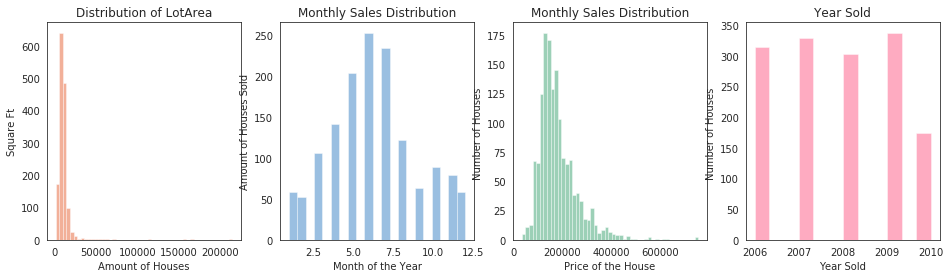

In [8]:
import seaborn as sns
sns.set_style('white')

f, axes = plt.subplots(ncols=4, figsize=(16,4))

# Lot Area: In Square Feet
sns.distplot(train['LotArea'], kde=False, color="#DF3A01", ax=axes[0]).set_title("Distribution of LotArea")
axes[0].set_ylabel("Square Ft")
axes[0].set_xlabel("Amount of Houses")

# MoSold: Year of the Month sold
sns.distplot(train['MoSold'], kde=False, color="#045FB4", ax=axes[1]).set_title("Monthly Sales Distribution")
axes[1].set_ylabel("Amount of Houses Sold")
axes[1].set_xlabel("Month of the Year")

# House Value
sns.distplot(train['SalePrice'], kde=False, color="#088A4B", ax=axes[2]).set_title("Monthly Sales Distribution")
axes[2].set_ylabel("Number of Houses ")
axes[2].set_xlabel("Price of the House")

# YrSold: Year the house was sold.
sns.distplot(train['YrSold'], kde=False, color="#FE2E64", ax=axes[3]).set_title("Year Sold")
axes[3].set_ylabel("Number of Houses ")
axes[3].set_xlabel("Year Sold")

plt.show()

## Right-Skewed Distribution Summary:
In a right skew or positive skew the mean is most of the times to the right of the median. There is a higher frequency of occurence to the left of the distribution plot leading to more exceptions (outliers to the right). Nevertheless, there is a way to transform this histogram into a normal distributions by using <b>log transformations</b> which will be discussed further below.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



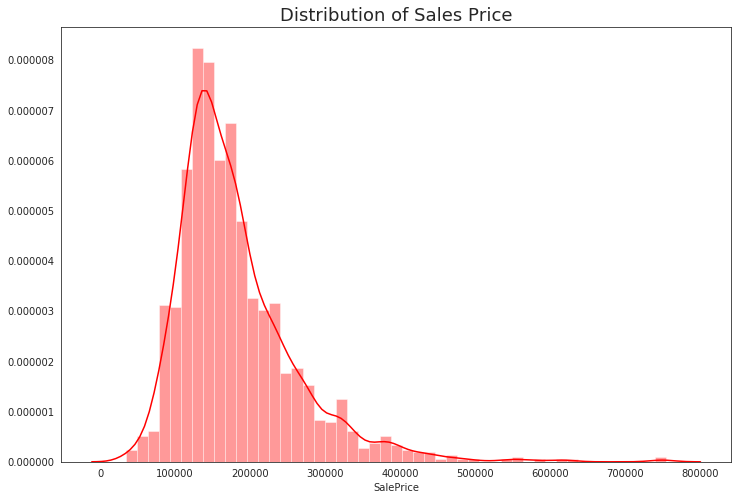

In [9]:
# Maybe we can try this with plotly.
plt.figure(figsize=(12,8))
sns.distplot(train['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()

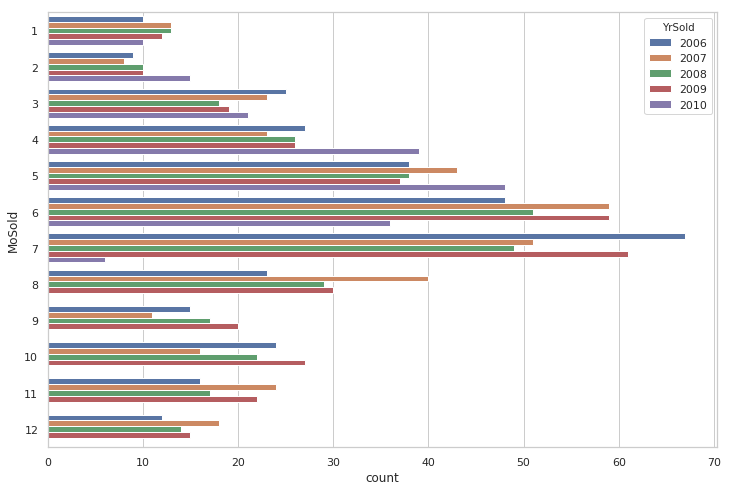

In [10]:
# People tend to move during the summer
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(y="MoSold", hue="YrSold", data=train)
plt.show()

Text(0.5,1,'Houses Sold per Year')

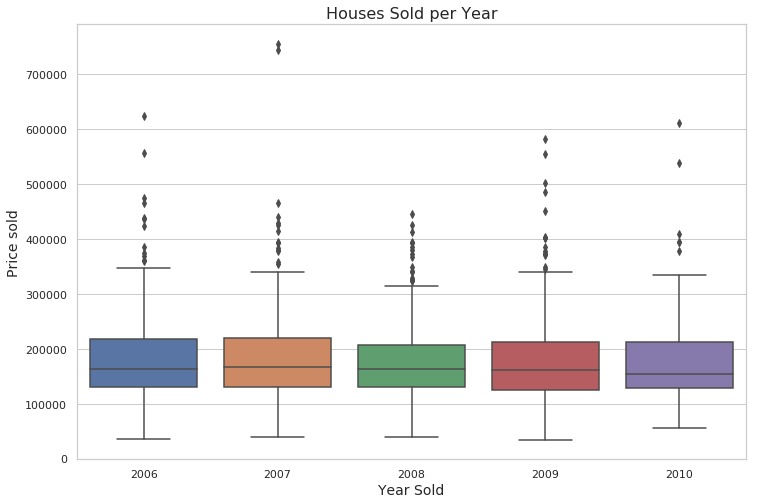

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

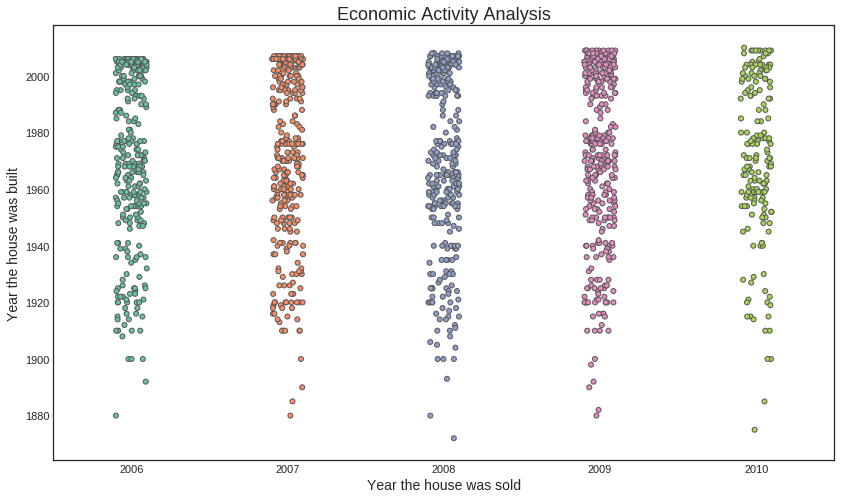

In [12]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='YrSold', y='YearBuilt', data=train, jitter=True, palette="Set2", linewidth=1)
plt.title('Economic Activity Analysis', fontsize=18)
plt.xlabel('Year the house was sold', fontsize=14)
plt.ylabel('Year the house was built', rotation=90, fontsize=14)
plt.show()

In [13]:
outsidesurr_df.describe()

,SalePrice,LotFrontage,LotArea,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,70.049958,10516.828082,6.321918,2007.815753
std,79442.502883,24.284752,9981.264932,2.703626,1.328095
min,34900.000000,21.000000,1300.000000,1.000000,2006.000000
25%,129975.000000,59.000000,7553.500000,5.000000,2007.000000
50%,163000.000000,69.000000,9478.500000,6.000000,2008.000000
75%,214000.000000,80.000000,11601.500000,8.000000,2009.000000
max,755000.000000,313.000000,215245.000000,12.000000,2010.000000


In [14]:
outsidesurr_df.columns

Index(['SalePrice', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'Condition1', 'Condition2', 'PavedDrive', 'Street', 'Alley',
       'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType',
       'LotShape', 'SaleCondition'],
      dtype='object')

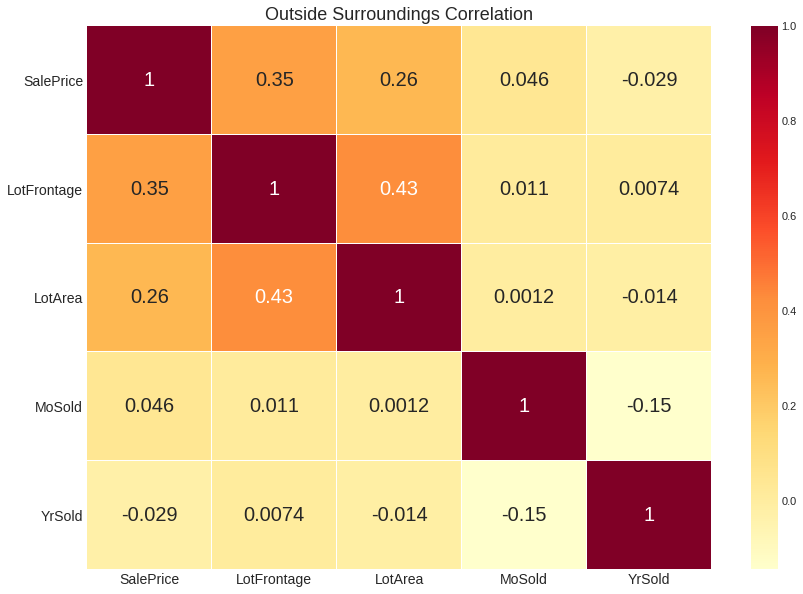

In [15]:
# Lot Area and Lot Frontage influenced hugely on the price. 
# However, YrSold does not have that much of a negative correlation with SalePrice as we previously thought.
# Meaning the state of IOWA was not affected as other states.
plt.style.use('seaborn-white')
corr = outsidesurr_df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Outside Surroundings Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Type of Zoning:
<a id="zoning"></a>

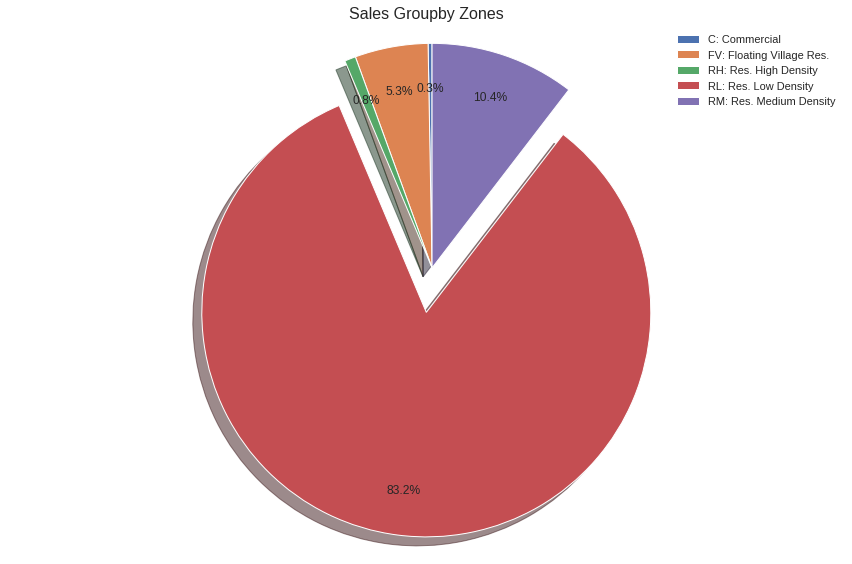

In [16]:
# We already know which neighborhoods were the most sold but which neighborhoods gave the most revenue. 
# This might indicate higher demand toward certain neighborhoods.
plt.style.use('seaborn-white')
zoning_value = train.groupby(by=['MSZoning'], as_index=False)['SalePrice'].sum()
zoning = zoning_value['MSZoning'].values.tolist()


# Let's create a pie chart.
labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']
total_sales = zoning_value['SalePrice'].values.tolist()
explode = (0, 0, 0, 0.1, 0)

fig, ax1 = plt.subplots(figsize=(12,8))
texts = ax1.pie(total_sales, explode=explode, autopct='%.1f%%', shadow=True, startangle=90, pctdistance=0.8,
       radius=0.5)


ax1.axis('equal')
plt.title('Sales Groupby Zones', fontsize=16)
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

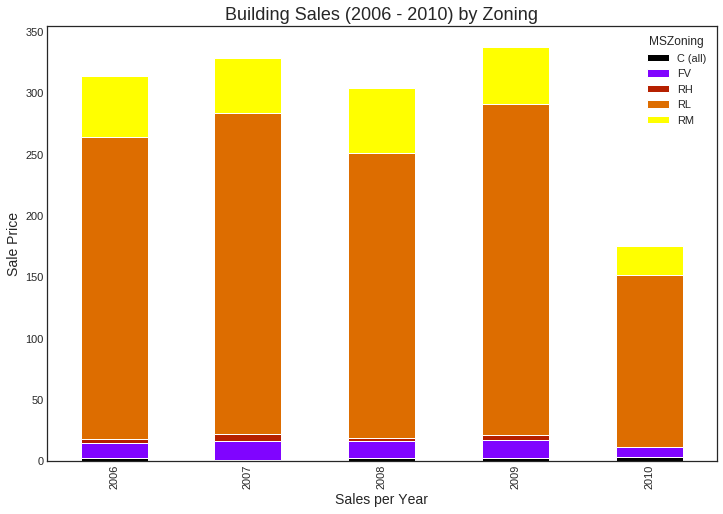

In [17]:
plt.style.use('seaborn-white')
SalesbyZone = train.groupby(['YrSold','MSZoning']).SalePrice.count()
SalesbyZone.unstack().plot(kind='bar',stacked=True, colormap= 'gnuplot',  
                           grid=False,  figsize=(12,8))
plt.title('Building Sales (2006 - 2010) by Zoning', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Sales per Year', fontsize=14)
plt.show()

## Neighborhoods: 
<a id="neighborhoods">


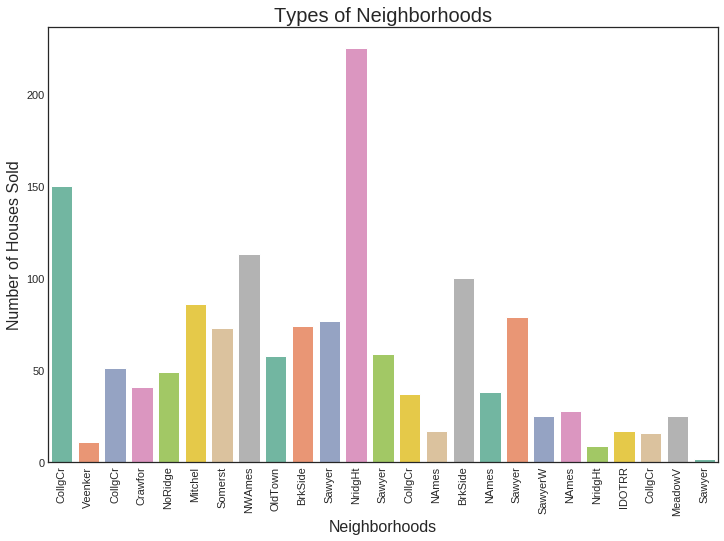

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Neighborhood", data=train, palette="Set2")
ax.set_title("Types of Neighborhoods", fontsize=20)
ax.set_xlabel("Neighborhoods", fontsize=16)
ax.set_ylabel("Number of Houses Sold", fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] ,rotation=90)
plt.show()

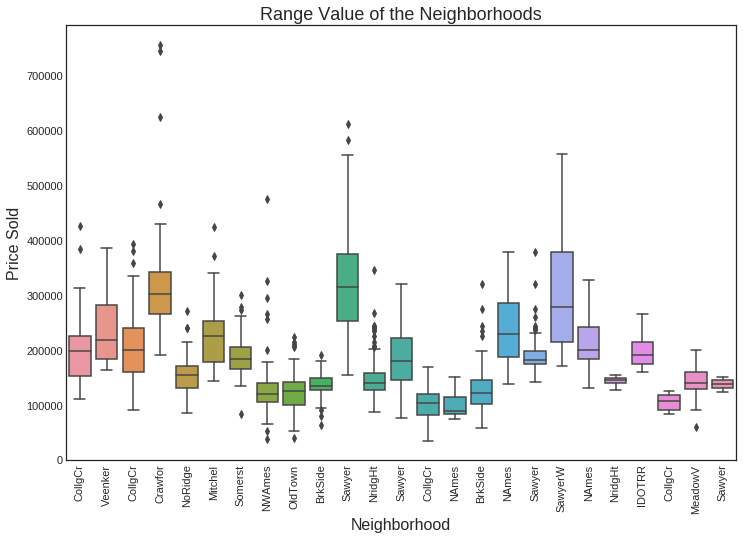

In [19]:
# Sawyer and SawyerW tend to be the most expensive neighberhoods. Nevertheless, what makes them the most expensive
# Is it the LotArea or LotFrontage? Let's find out!
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train)
ax.set_title("Range Value of the Neighborhoods", fontsize=18)
ax.set_ylabel('Price Sold', fontsize=16)
ax.set_xlabel('Neighborhood', fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] , rotation=90)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



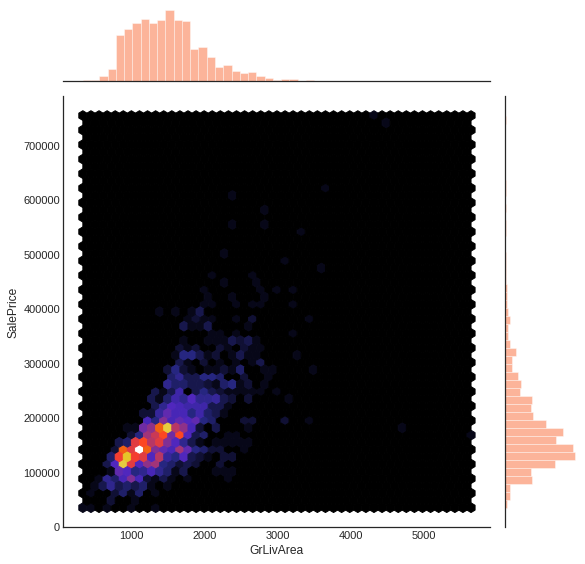

In [20]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=train,
              kind='hex', cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



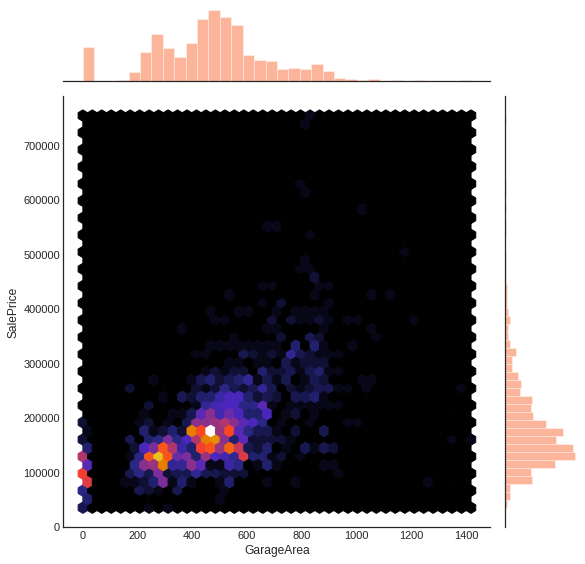

In [21]:
sns.jointplot(x='GarageArea',y='SalePrice',data=train,
              kind='hex', cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



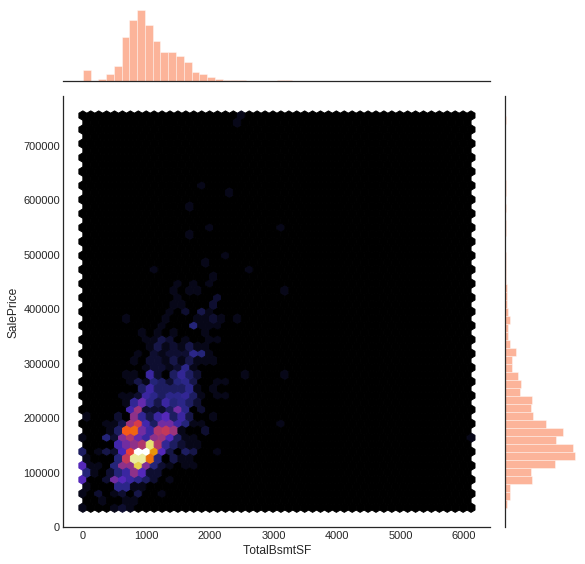

In [22]:
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=train,
              kind='hex', cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



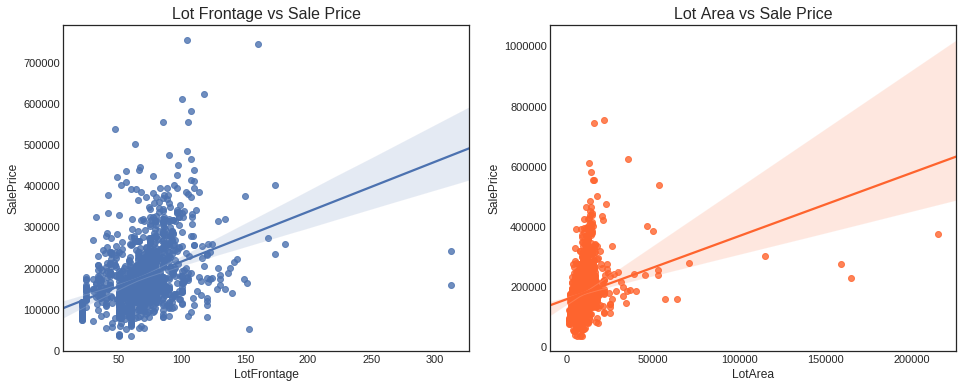

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=train)
ax.set_title("Lot Frontage vs Sale Price", fontsize=16)

plt.subplot(122)
ax1 = sns.regplot(x="LotArea", y="SalePrice", data=train, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=16)

plt.show()

In [24]:
building_df.head()

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,
1,208500,60,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Typ,Attchd,2003.0,RFn,2,548,2,2008,WD,Normal
2,181500,20,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Typ,Attchd,1976.0,RFn,2,460,5,2007,WD,Normal
3,223500,60,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,Typ,Attchd,2001.0,RFn,2,608,9,2008,WD,Normal
4,140000,70,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,Typ,Detchd,1998.0,Unf,3,642,2,2006,WD,Abnorml
5,250000,60,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,Typ,Attchd,2000.0,RFn,3,836,12,2008,WD,Normal


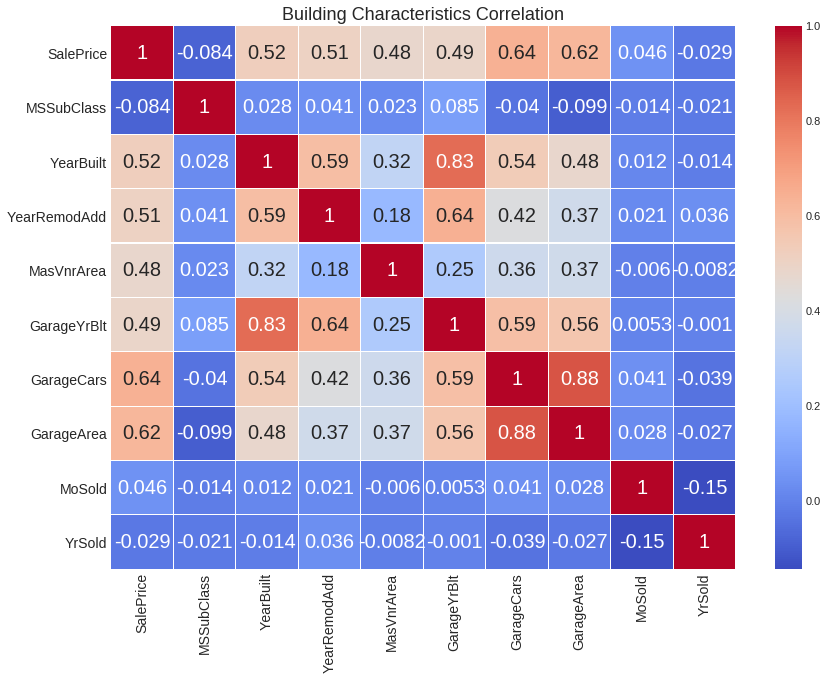

In [25]:
corr = building_df.corr()

g = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':20})
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 8)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Building Characteristics Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [26]:
# To understand better our data I will create a category column for SalePrice.
train['Price_Range'] = np.nan
lst = [train]

# Create a categorical variable for SalePrice
# I am doing this for further visualizations.
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'
    
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price_Range
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Medium


/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



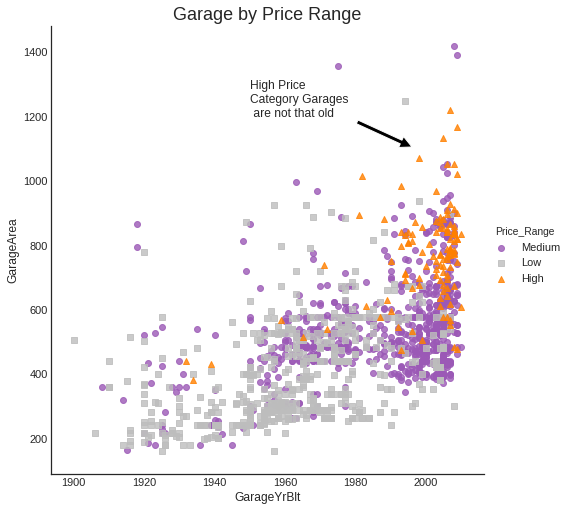

In [27]:
import matplotlib.pyplot as plt
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=train, hue='Price_Range', fit_reg=False, size=7, palette=palette,
          markers=["o", "s", "^"])
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Miscellaneous and Utilities:
<a id="utilities"></a>

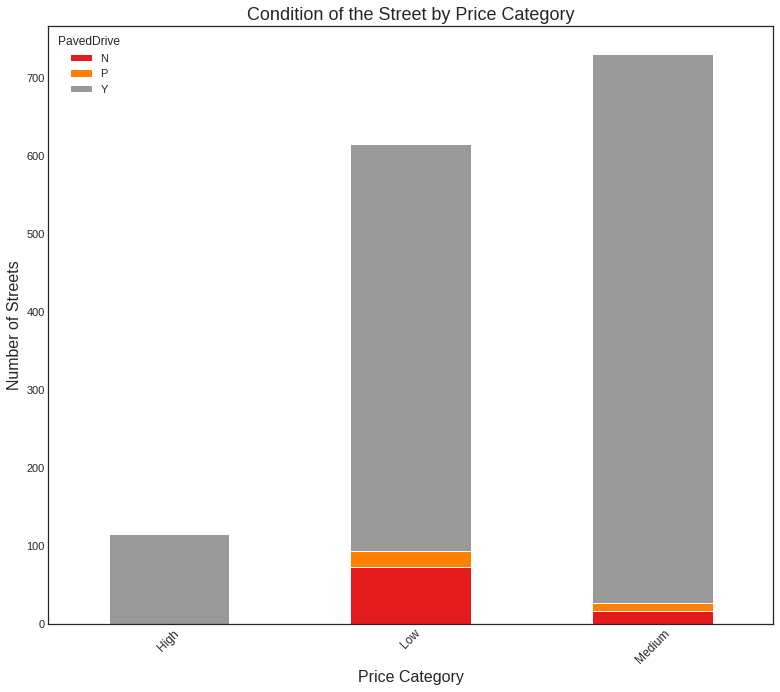

In [28]:
plt.style.use('seaborn-white')
types_foundations = train.groupby(['Price_Range', 'PavedDrive']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='Set1', figsize=(13,11), grid=False)
plt.ylabel('Number of Streets', fontsize=16)
plt.xlabel('Price Category', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.title('Condition of the Street by Price Category', fontsize=18)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



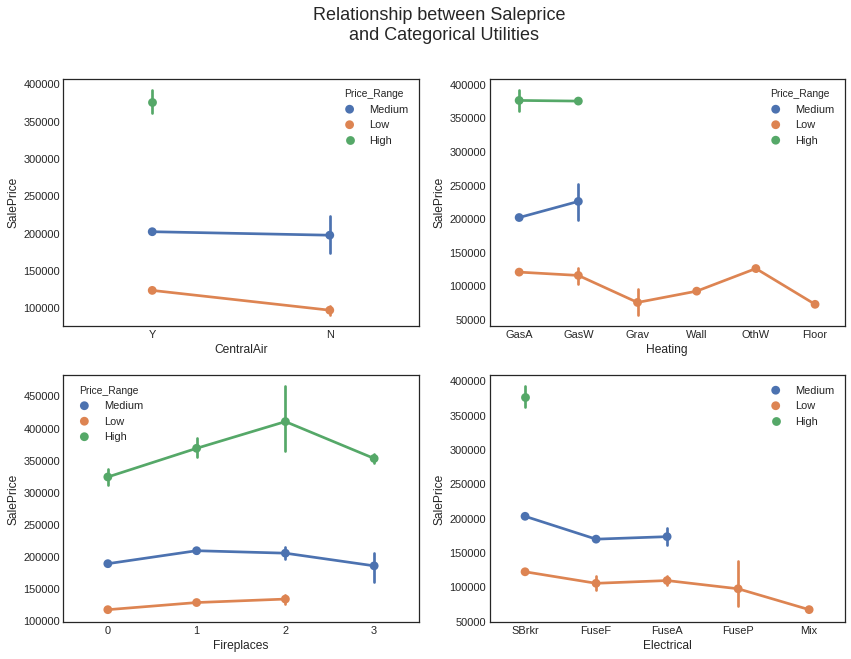

In [29]:
# We can see that CentralAir impacts until some extent the price of the house.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Relationship between Saleprice \n and Categorical Utilities', fontsize=18)
sns.pointplot(x='CentralAir', y='SalePrice', hue='Price_Range', data=train, ax=ax1)
sns.pointplot(x='Heating', y='SalePrice', hue='Price_Range', data=train, ax=ax2)
sns.pointplot(x='Fireplaces', y='SalePrice', hue='Price_Range', data=train, ax=ax3)
sns.pointplot(x='Electrical', y='SalePrice', hue='Price_Range', data=train, ax=ax4)

plt.legend(loc='best')
plt.show()

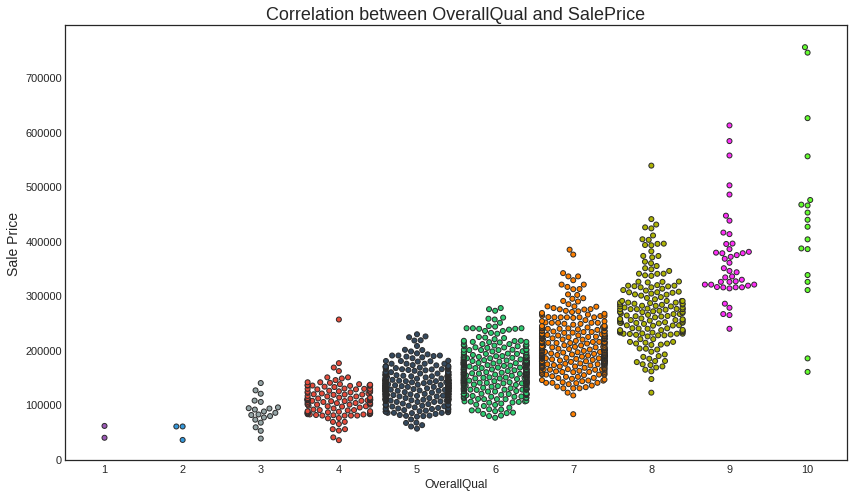

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(14,8))
palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#FF8000", "#AEB404", "#FE2EF7", "#64FE2E"]

sns.swarmplot(x="OverallQual", y="SalePrice", data=train, ax=ax, palette=palette, linewidth=1)
plt.title('Correlation between OverallQual and SalePrice', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



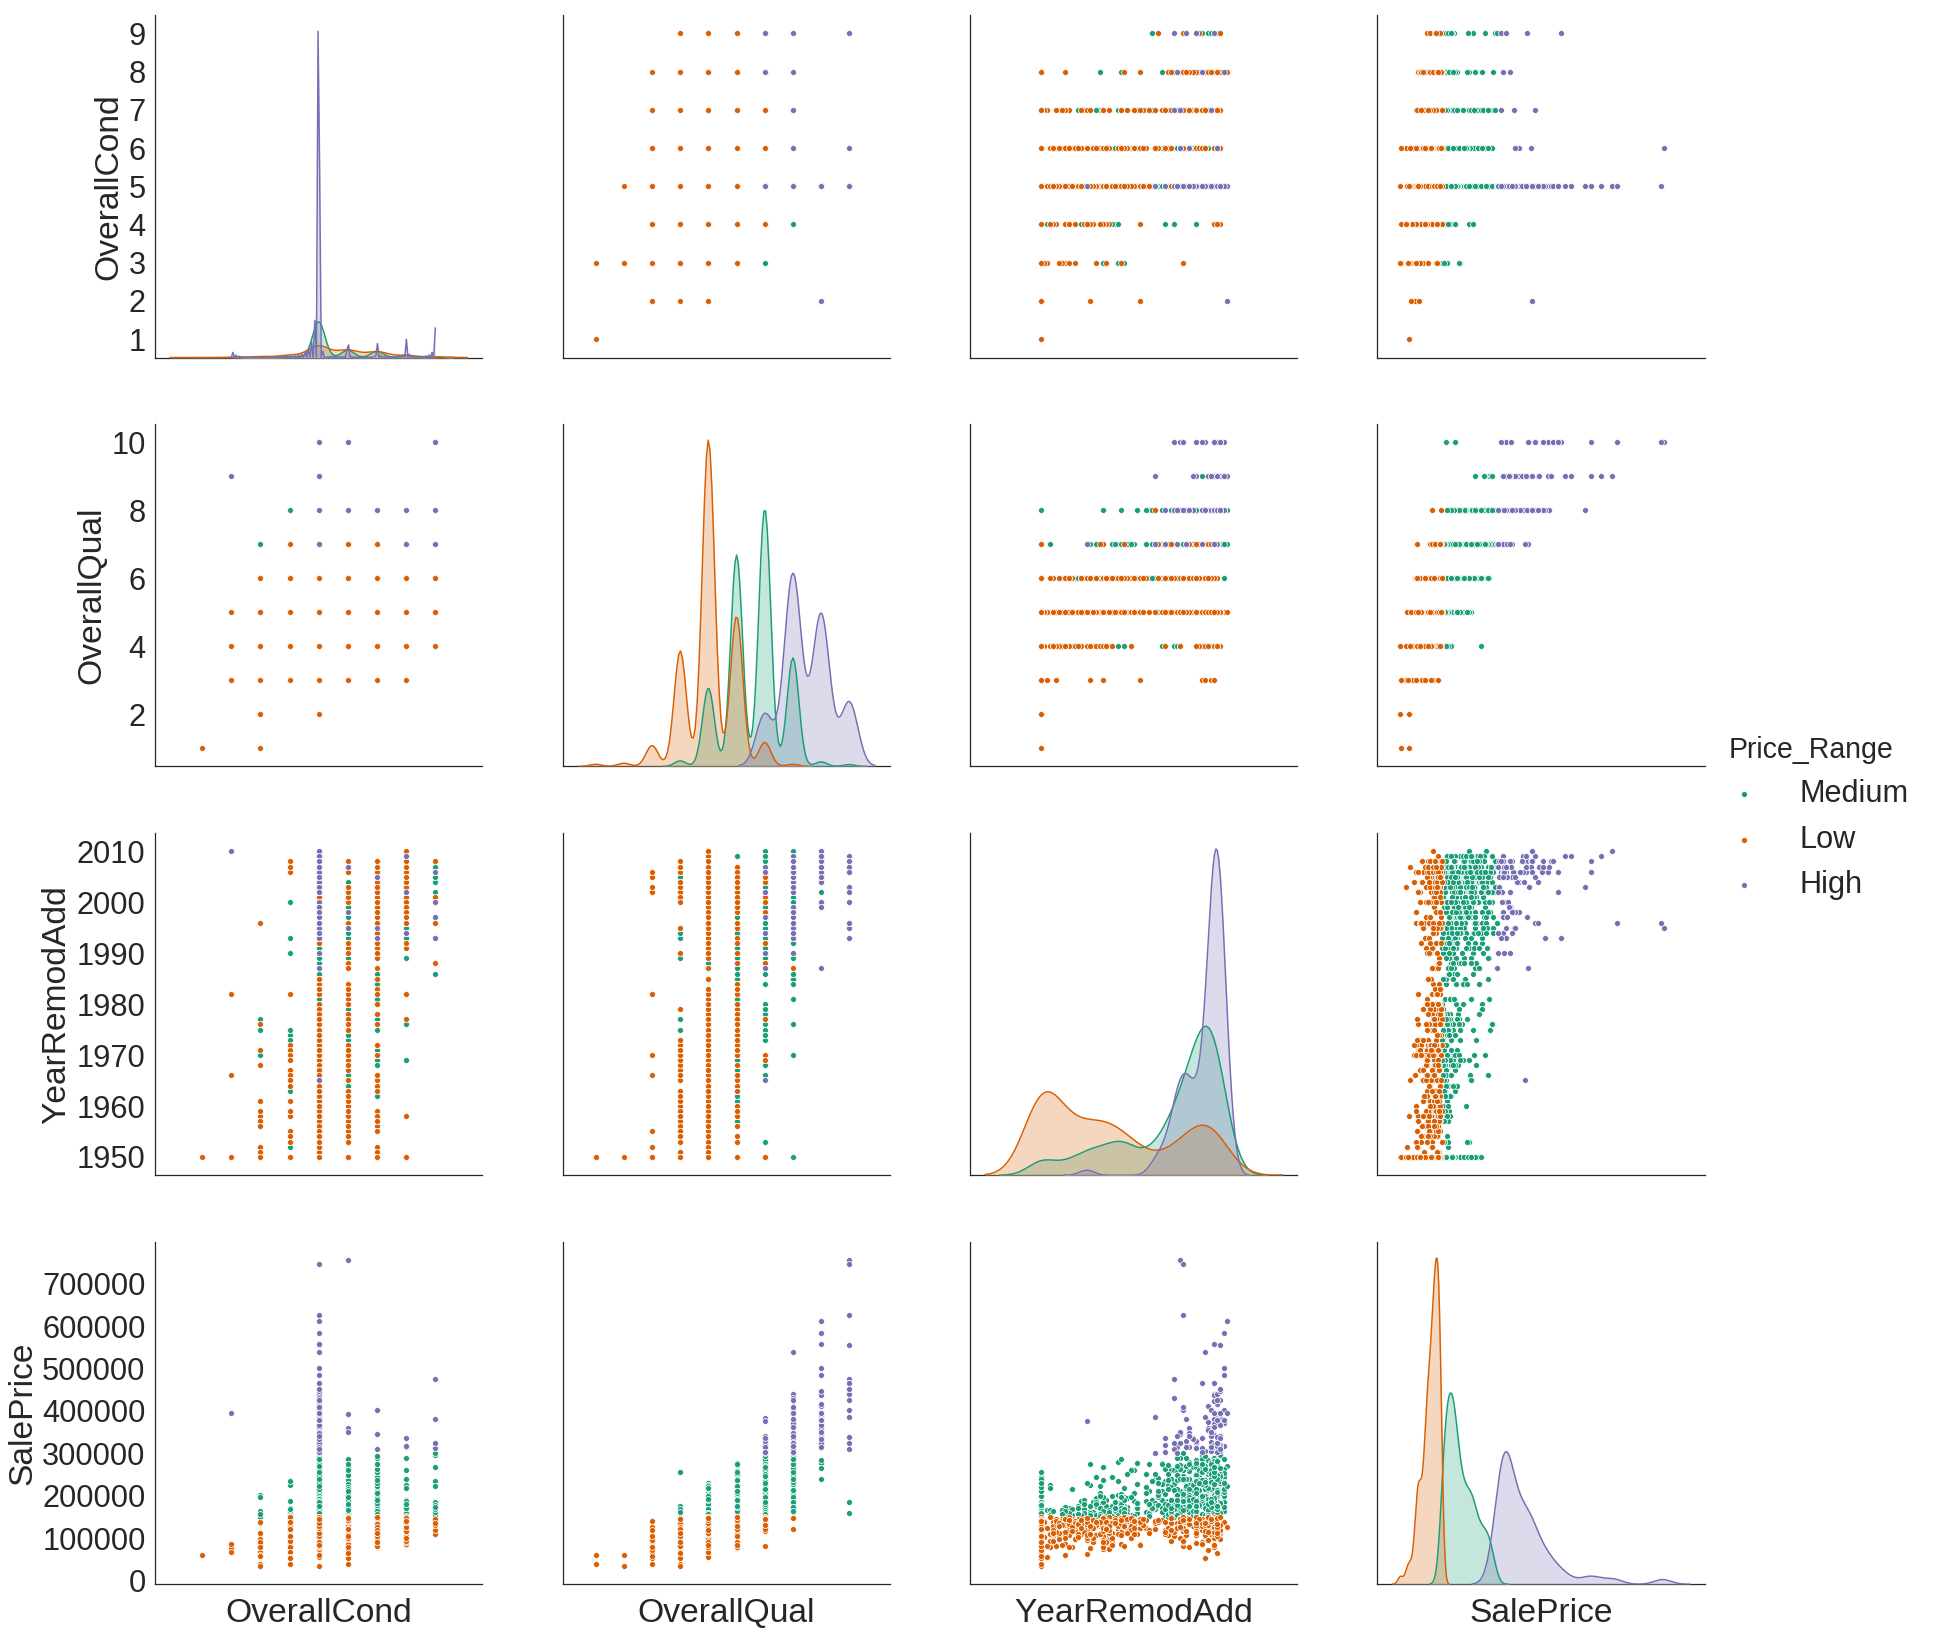

In [31]:
with sns.plotting_context("notebook",font_scale=2.8):
    g = sns.pairplot(train, vars=["OverallCond", "OverallQual", "YearRemodAdd", "SalePrice"],
                hue="Price_Range", palette="Dark2", size=6)


g.set(xticklabels=[]);

plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



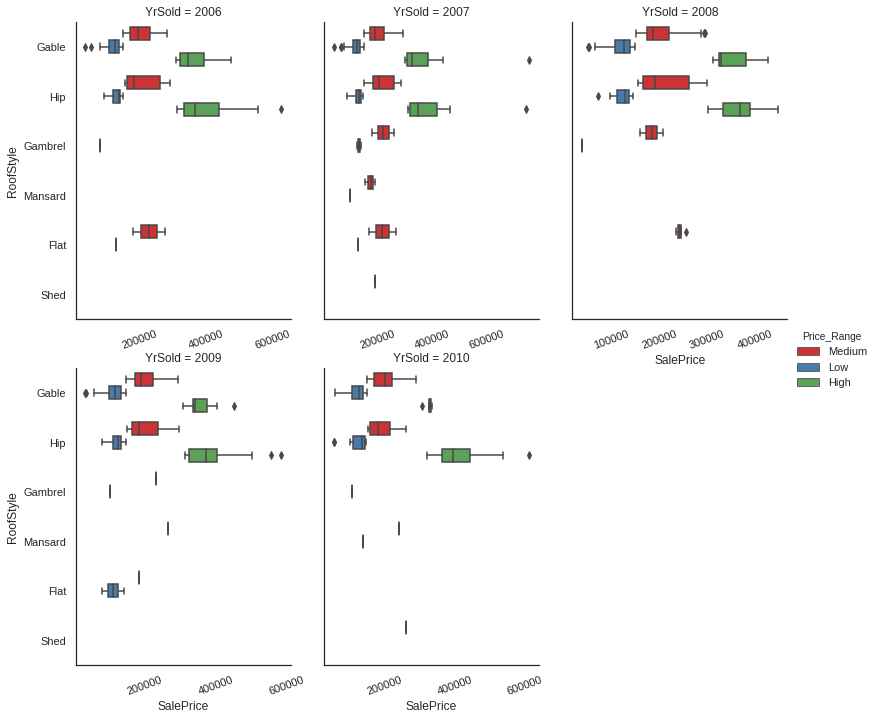

In [32]:
# What type of material is considered to have a positive effect on the quality of the house?
# Let's start with the roof material

with sns.plotting_context("notebook",font_scale=1):
    g = sns.factorplot(x="SalePrice", y="RoofStyle", hue="Price_Range",
                   col="YrSold", data=train, kind="box", size=5, aspect=.75, sharex=False, col_wrap=3, orient="h",
                      palette='Set1');
    for ax in g.axes.flatten(): 
        for tick in ax.get_xticklabels(): 
            tick.set(rotation=20)

plt.show()

**Note:** Interestingly, the Masonry Veneer type of stone became popular after 2007 for the houses that belong to the **high** Price Range category. I wonder why? <br>
**For some reason during the year of 2007, the Saleprice of houses within the high range made of stone dropped drastically! 



/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



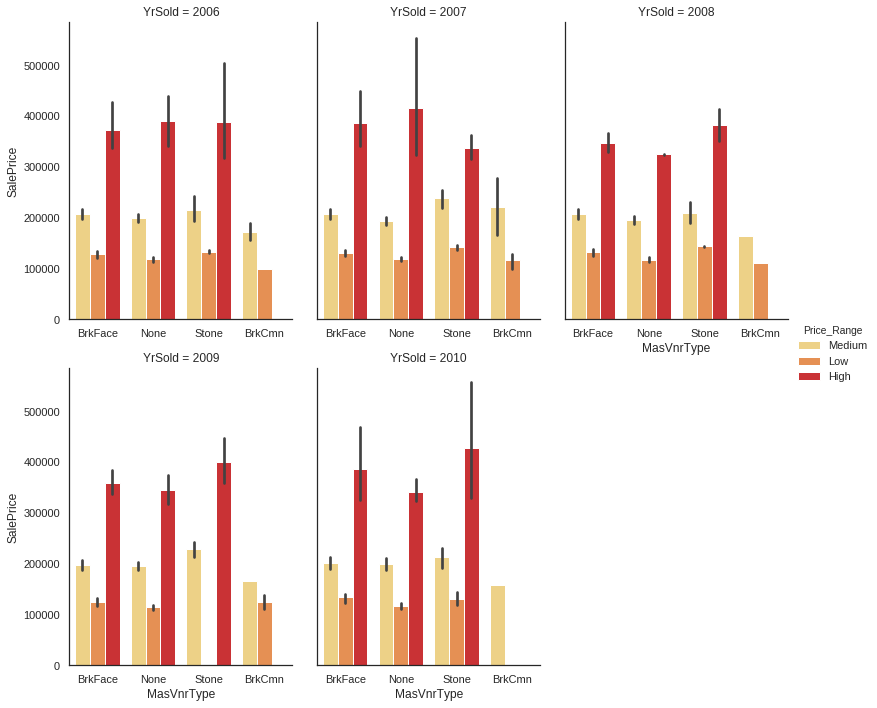

In [33]:
with sns.plotting_context("notebook",font_scale=1):
    g = sns.factorplot(x="MasVnrType", y="SalePrice", hue="Price_Range",
                   col="YrSold", data=train, kind="bar", size=5, aspect=.75, sharex=False, col_wrap=3,
                      palette="YlOrRd");
    
plt.show()

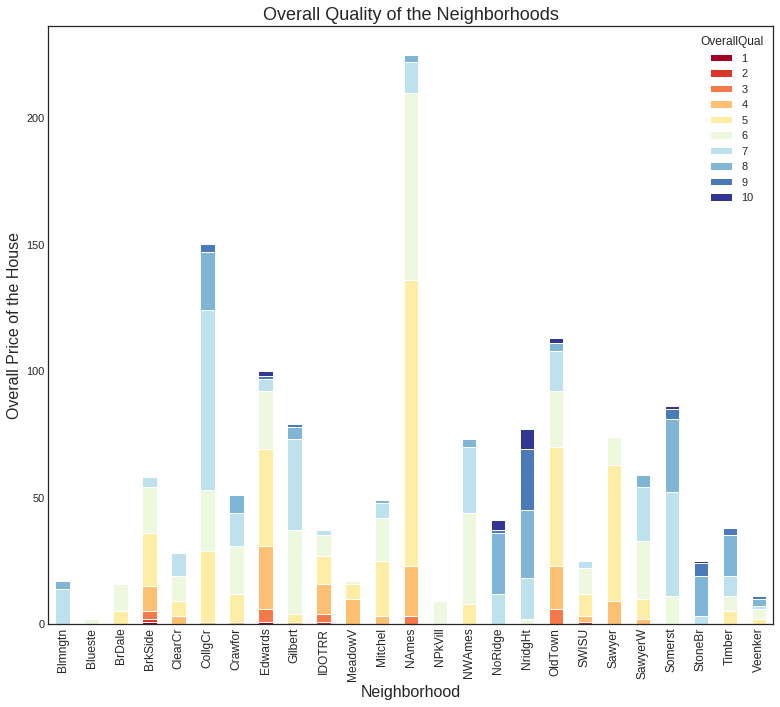

In [34]:
plt.style.use('seaborn-white')
types_foundations = train.groupby(['Neighborhood', 'OverallQual']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(13,11), grid=False)
plt.ylabel('Overall Price of the House', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.title('Overall Quality of the Neighborhoods', fontsize=18)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



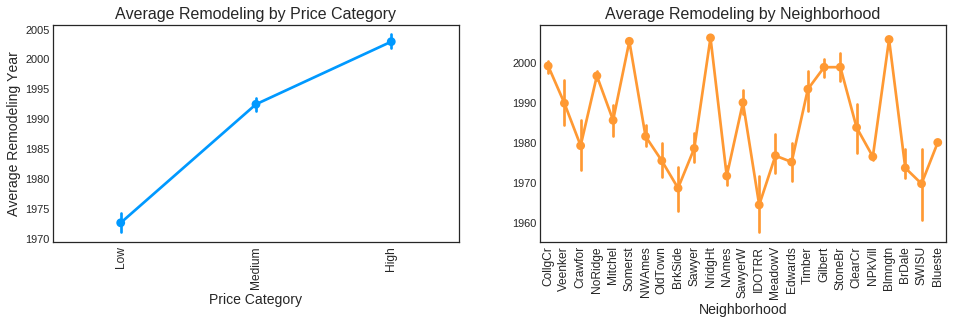

In [35]:
# Which houses neighborhoods remodeled the most.
# price_categories = ['Low', 'Medium', 'High']
# remod = train['YearRemodAdd'].groupby(train['Price_Range']).mean()

fig, ax = plt.subplots(ncols=2, figsize=(16,4))
plt.subplot(121)
sns.pointplot(x="Price_Range",  y="YearRemodAdd", data=train, order=["Low", "Medium", "High"], color="#0099ff")
plt.title("Average Remodeling by Price Category", fontsize=16)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Average Remodeling Year', fontsize=14)
plt.xticks(rotation=90, fontsize=12)

plt.subplot(122)
sns.pointplot(x="Neighborhood",  y="YearRemodAdd", data=train, color="#ff9933")
plt.title("Average Remodeling by Neighborhood", fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('')
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [36]:
numeric_features = train.dtypes[train.dtypes != "object"].index

# Top 5 most skewed features
skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(5)

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



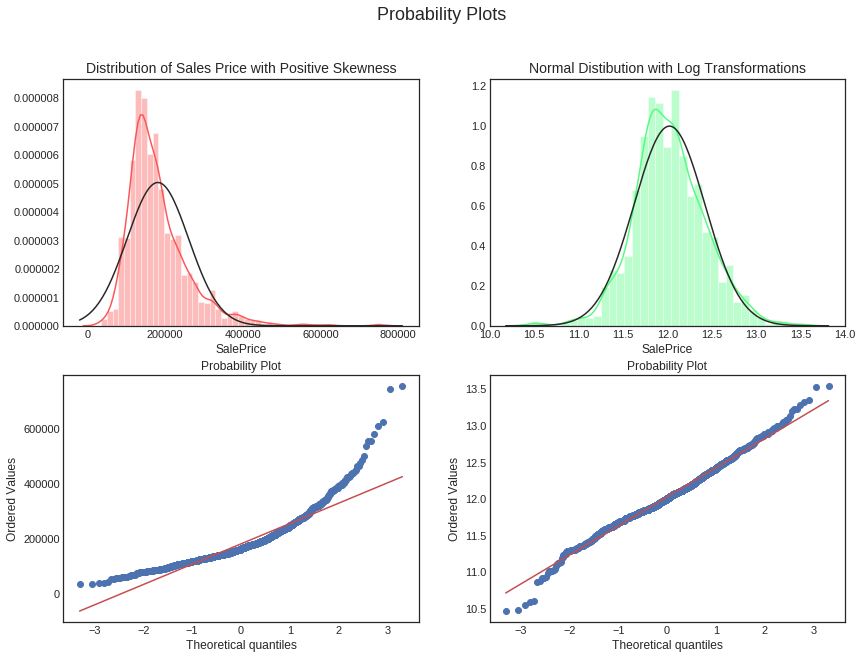

In [37]:
from scipy.stats import norm

# norm = a normal continous variable.

log_style = np.log(train['SalePrice'])  # log of salesprice

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(train['SalePrice'], color="#FA5858", ax=ax1, fit=norm)
ax1.set_title("Distribution of Sales Price with Positive Skewness", fontsize=14)
ax2 = sns.distplot(log_style, color="#58FA82",ax=ax2, fit=norm)
ax2.set_title("Normal Distibution with Log Transformations", fontsize=14)
ax3 = stats.probplot(train['SalePrice'], plot=ax3)
ax4 = stats.probplot(log_style, plot=ax4)

plt.show()

**Kurtosis**:
<ul>
<li><b>Kourtosis</b> is a measure of how extreme observations are in a dataset.</li>
<li> The <b> greater the kurtosis coefficient </b>, the more peaked the distribution around the mean is. </li>
<li><b>Greater coefficient</b> also means fatter tails, which means there is an increase in tail risk (extreme results) </li>
</ul>

**Reference**:
Investopedia: https://www.investopedia.com/terms/m/mesokurtic.asp


In [38]:
print('Skewness for Normal D.: %f'% train['SalePrice'].skew())
print('Skewness for Log D.: %f'% log_style.skew())
print('Kurtosis for Normal D.: %f' % train['SalePrice'].kurt())
print('Kurtosis for Log D.: %f' % log_style.kurt())

Skewness for Normal D.: 1.882876
Skewness for Log D.: 0.121335
Kurtosis for Normal D.: 6.536282
Kurtosis for Log D.: 0.809532


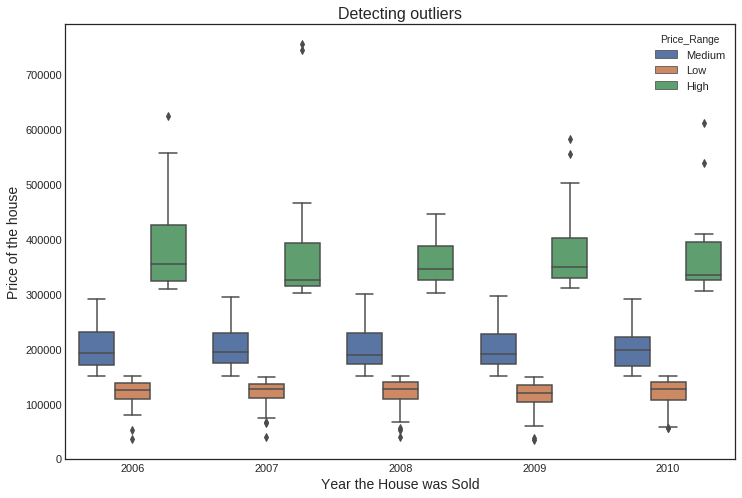

In [39]:
# Most outliers are in the high price category nevertheless, in the year of 2007 saleprice of two houses look extremely high!

fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue='Price_Range', data=train)
plt.title('Detecting outliers', fontsize=16)
plt.xlabel('Year the House was Sold', fontsize=14)
plt.ylabel('Price of the house', fontsize=14)
plt.show()

In [40]:
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[:11]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



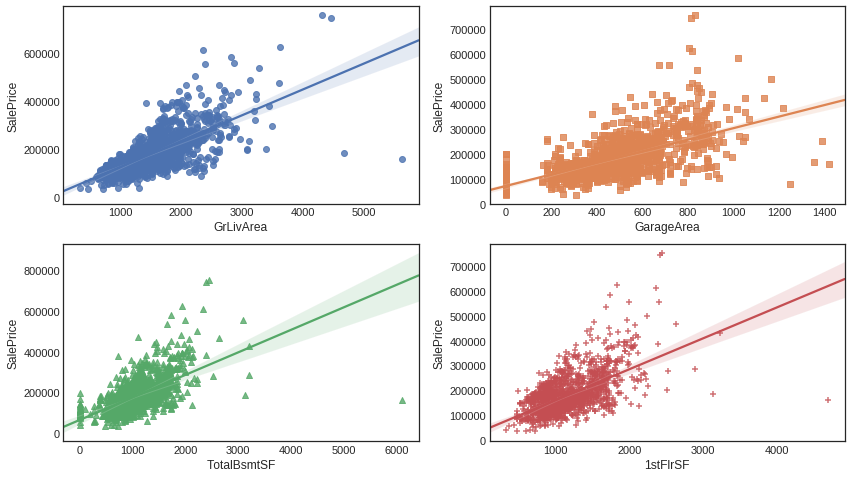

In [41]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,8))
var1 = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var1]], axis=1)
sns.regplot(x=var1, y='SalePrice', data=data, fit_reg=True, ax=ax1)


var2 = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var2]], axis=1)
sns.regplot(x=var2, y='SalePrice', data=data, fit_reg=True, ax=ax2, marker='s')

var3 = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var3]], axis=1)
sns.regplot(x=var3, y='SalePrice', data=data, fit_reg=True, ax=ax3, marker='^')

var4 = '1stFlrSF'
data = pd.concat([train['SalePrice'], train[var4]], axis=1)
sns.regplot(x=var4, y='SalePrice', data=data, fit_reg=True, ax=ax4, marker='+')

plt.show()

In [42]:
y_train = train['SalePrice'].values
# We will concatenate but we will split further on.
rtrain = train.shape[0]
ntest = test.shape[0]
train.drop(['SalePrice', 'Price_Range', 'Id'], axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [43]:
complete_data = pd.concat([train, test])
complete_data.shape

(2919, 79)

In [44]:
total_nas = complete_data.isnull().sum().sort_values(ascending=False)
percent_missing = (complete_data.isnull().sum()/complete_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_nas, percent_missing], axis=1, keys=['Total_M', 'Percentage'])


# missing.head(9) # We have 19 columns with NAs

## Transforming Missing Values:
<a id="transforming_values"></a>


In [45]:
complete_data["PoolQC"] = complete_data["PoolQC"].fillna("None")
complete_data["MiscFeature"] = complete_data["MiscFeature"].fillna("None")
complete_data["Alley"] = complete_data["Alley"].fillna("None")
complete_data["Fence"] = complete_data["Fence"].fillna("None")
complete_data["FireplaceQu"] = complete_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    complete_data[col] = complete_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    complete_data[col] = complete_data[col].fillna('None')
complete_data['MSZoning'] = complete_data['MSZoning'].fillna(complete_data['MSZoning'].mode()[0])
complete_data["MasVnrType"] = complete_data["MasVnrType"].fillna("None")
complete_data["Functional"] = complete_data["Functional"].fillna("Typ")
complete_data['Electrical'] = complete_data['Electrical'].fillna(complete_data['Electrical'].mode()[0])
complete_data['KitchenQual'] = complete_data['KitchenQual'].fillna(complete_data['KitchenQual'].mode()[0])
complete_data['Exterior1st'] = complete_data['Exterior1st'].fillna(complete_data['Exterior1st'].mode()[0])
complete_data['Exterior2nd'] = complete_data['Exterior2nd'].fillna(complete_data['Exterior2nd'].mode()[0])
complete_data['SaleType'] = complete_data['SaleType'].fillna(complete_data['SaleType'].mode()[0])
complete_data['MSSubClass'] = complete_data['MSSubClass'].fillna("None")

In [46]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
complete_data["LotFrontage"] = complete_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    complete_data[col] = complete_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    complete_data[col] = complete_data[col].fillna(0)
    
complete_data["MasVnrArea"] = complete_data["MasVnrArea"].fillna(0)

In [47]:
# Drop
complete_data = complete_data.drop(['Utilities'], axis=1)

## Combining Attributes
<a id="combining_atributes"></a>

In [48]:
# Adding total sqfootage feature 
complete_data['TotalSF'] = complete_data['TotalBsmtSF'] + complete_data['1stFlrSF'] + complete_data['2ndFlrSF']

## Dealing with Numerical and Categorical Values:
<a id="num_cat_val"></a>

## Transforming our Data:
<ul>
<li> Separate the <b> features </b> and <b> labels </b> from the training dataset. </li>
<li> Separate <b> numeric </b> and <b> categorical </b> variables for the purpose of running them in separate pipelines and scaling them with their respective scalers. </li>

</ul>

In [49]:
complete_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,2566.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,2524.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,2706.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,2473.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,3343.0


In [50]:
# splitting categorical variables with numerical variables for encoding.
categorical = complete_data.select_dtypes(['object'])
numerical = complete_data.select_dtypes(exclude=['object'])

print(categorical.shape)
print(numerical.shape)

(2919, 42)
(2919, 37)


## Categorical Encoding Class:
<a id="categorical_class"></a>
This is a way to encode our features in a way that it avoids the assumption that two nearby values are more similar than two distant values. This is the reason we should avoid using LabelEncoder to scale features (inputs) in our dataset and in addition the word **LabelEncoder** is used for scaling labels (outputs). This could be used more often in **binary classification problems** were no *association* exists between the outputs.

In [51]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

## Combine Attribute Class:
<a id="combining"></a>
This class will help us to include the total area variable into our pipeline for further scaling.

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

# class combination attribute.
# First we need to know the index possition of the other cloumns that make the attribute.
numerical.columns.get_loc("TotalBsmtSF") # Index Number 37
numerical.columns.get_loc("1stFlrSF") # Index NUmber 42
numerical.columns.get_loc("2ndFlrSF") # Index NUmber 43

ix_total, ix_first, ix_second = 9, 10, 11
# complete_data['TotalSF'] = complete_data['TotalBsmtSF'] + complete_data['1stFlrSF'] + complete_data['2ndFlrSF']

class CombineAttributes(BaseEstimator, TransformerMixin):
    
    def __init__(self, total_area=True): # No args or kargs
        self.total_area = total_area
        
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        total_sf = X[:,ix_total] + X[:,ix_first] + X[:,ix_second]
        if self.total_area:
            return np.c_[X, total_sf]
        else: 
            return np.c_[X]

attr_adder = CombineAttributes(total_area=True)
extra_attribs = attr_adder.transform(complete_data.values)

In [53]:
# Scikit-Learn does not handle dataframes in pipeline so we will create our own class.
# Reference: Hands-On Machine Learning
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Pipelines:
<a id="pipelines"></a> 

Create our numerical and cateogircal pipelines to scale our features.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lst_numerical = list(numerical)

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(lst_numerical)),
    ('extra attributes', CombineAttributes()),
    ('std_scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
                                    'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle',
                                    'RoofMatl', 'Exterior1st',  'Exterior2nd','ExterQual','ExterCond', 'Foundation',
                                    'Heating','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                                    'PavedDrive', 'SaleType', 'SaleCondition'])),
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])

In [55]:
# Combine our pipelines!
from sklearn.pipeline import FeatureUnion

main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numeric_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

data_prepared = main_pipeline.fit_transform(complete_data)
data_prepared

array([[ 0.06733141, -0.20935903, -0.21787869, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87361603,  0.48189993, -0.07204408, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06733141, -0.07110724,  0.13719688, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87361603,  4.16861441,  1.24680804, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65542357, -0.34761082,  0.0346054 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06733141,  0.20539635, -0.06862014, ...,  0.        ,
         1.        ,  0.        ]])

In [56]:
features = data_prepared
labels = np.log1p(y_train) # Scaling the Saleprice column.

train_scaled = features[:rtrain] 
test_scaled = features[rtrain:]

<h1 align="center"> Implementing Predictive Models </h1>

<img src="http://precisionanalytica.com/blog/wp-content/uploads/2014/09/Predictive-Modeling.jpg">

## Residual Plot:
<a id="residual_plot"></a>
<ul>
<li><b>Residual plots</b> will give us more or less the actual prediction errors our models are making. In this example, I will use <b>yellowbrick library</b> (statistical visualizations for machine learning) and a simple linear regression model.  In our <b>legends</b> of the residual plot it says training and test data but in this scenario instead of the test set it is the <b>validation set</b> we are using. [If there is a possibility to change the name of the legend to validation I will make the update whenever possible.</li>
<li> Create a validation set within the training set to actually predict values. (Remember the test set does not have the training price, and also when testing data it should be done during the last instance of the project.) </li>

</ul>

In [57]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [58]:
# This is data that comes from the training test.
X_train, X_val, y_train, y_val = train_test_split(train_scaled, labels, test_size=0.25, random_state=42)


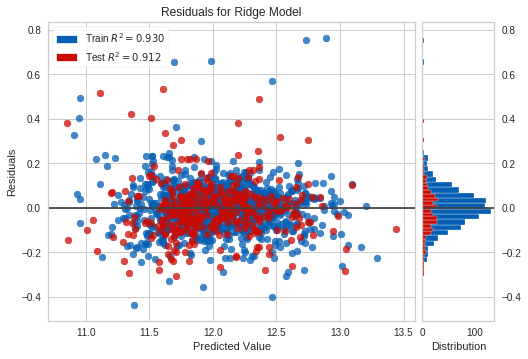

In [59]:
# Our validation set tends to perform better. Less Residuals.
ridge = Ridge()
visualizer = ResidualsPlot(ridge, train_color='#045FB4', test_color='r', line_color='#424242')
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)
g = visualizer.poof(outpath="residual_plot")

In [60]:
#Validation function
n_folds = 5

def rmsle_cv(model, features, labels):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(features) # Shuffle the data.
    rmse= np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse.mean())

In [61]:
rid_reg = Ridge()
rid_reg.fit(X_train, y_train)
y_pred = rid_reg.predict(X_val)
rmsle_cv(rid_reg, X_val, y_val)

0.14580014316886433

### RandomForestRegressor:
<a id="random_forest"></a> 
<img src="https://techblog.expedia.com/wp-content/uploads/2017/06/BoostedTreeExample.jpg">
**RandomForestRegressor** gives us more randomness, insead of searching through impurity the best feature, RandomForest picks features in a randomly manner to reduce variance at the expense of a higher bias. Nevertheless, this helps us find what the trend is. After all the trees have predicted the outcome for a specific instance, the average from all the DecisionTree models is taken and that will be the prediction for a specific instance.

In [62]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': list(range(50, 200, 25)), 'max_features': ['auto', 'sqrt', 'log2'], 
         'min_samples_leaf': list(range(50, 200, 50))}

grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 75, 100, 125, 150, 175], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
# Show best parameters.
grid_search_cv.best_params_

{'max_features': 'auto', 'min_samples_leaf': 50, 'n_estimators': 75}

In [65]:
# You can check the results with this functionof grid search.
# RandomSearchCV takes just a sample not all possible combinations like GridSearchCV.
# Mean test score is equivalent to 0.2677
grid_search_cv.cv_results_
df_results = pd.DataFrame(grid_search_cv.cv_results_)
df_results.sort_values(by='mean_test_score', ascending=True).head(2)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
53,0.198830,0.025627,0.013269,0.002251,log2,150,175,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.287446,0.271938,0.338126,0.299170,0.028264,54,0.29454,0.307650,0.332026,0.311405,0.015532
48,0.061267,0.002882,0.004852,0.000183,log2,150,50,"{'max_features': 'log2', 'min_samples_leaf': 1...",0.314796,0.276814,0.326403,0.306004,0.021177,53,0.31712,0.315197,0.326068,0.319462,0.004737


In [66]:
rand_model = grid_search_cv.best_estimator_

rand_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
# Final root mean squared error.
y_pred = rand_model.predict(X_val)
rand_mse = mean_squared_error(y_val, y_pred)
rand_rmse = np.sqrt(rand_mse)
rand_rmse

0.18208289098440567

In [68]:
# It was overfitting a bit.
score = rmsle_cv(rand_model, X_val, y_val)
print("Random Forest score: {:.4f}\n".format(score))

Random Forest score: 0.2452



Text(0,0.5,'Feature Scores')

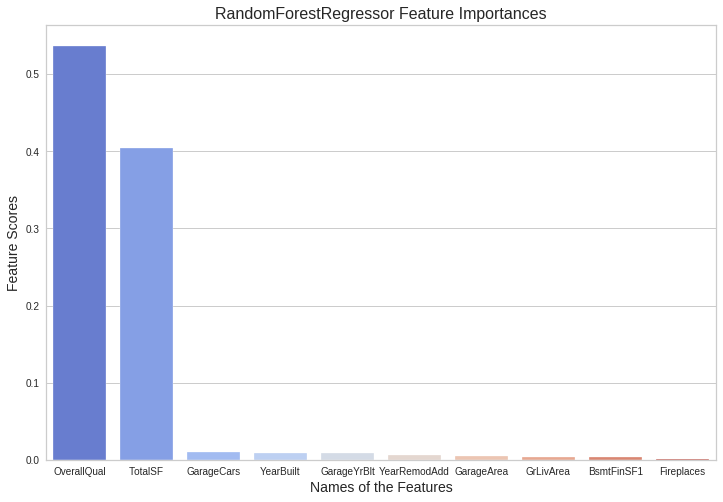

In [69]:
# Display scores next to attribute names.
# Reference Hands-On Machine Learning with Scikit Learn and Tensorflow
attributes = X_train
rand_results = rand_model.feature_importances_
cat_encoder = categorical_pipeline.named_steps["encoder"]
cat_features = list(cat_encoder.categories_[0])
total_features = lst_numerical + cat_features
feature_importance = sorted(zip(rand_results, total_features), reverse=True)
feature_arr = np.array(feature_importance)
# Top 10 features.
feature_scores = feature_arr[:,0][:10].astype(float)
feature_names = feature_arr[:,1][:10].astype(str)


d = {'feature_names': feature_names, 'feature_scores': feature_scores}
result_df = pd.DataFrame(data=d)

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='feature_names', y='feature_scores', data=result_df, palette="coolwarm")
plt.title('RandomForestRegressor Feature Importances', fontsize=16)
plt.xlabel('Names of the Features', fontsize=14)
plt.ylabel('Feature Scores', fontsize=14)

## GradientBoostingRegressor:
<img src="https://image.slidesharecdn.com/slides-140224130205-phpapp02/95/gradient-boosted-regression-trees-in-scikitlearn-21-638.jpg?cb=1393247097">
<a id="gradient_boosting"></a>
The Gradient Boosting Regressor class trains the models over the residuals (prediction errors) leading to smaller variances and higher accuracy.  

In [70]:
params = {'learning_rate': [0.05], 'loss': ['huber'], 'max_depth': [2], 'max_features': ['log2'], 'min_samples_leaf': [14], 
          'min_samples_split': [10], 'n_estimators': [3000]}


grad_boost = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=2, 
                                       max_features='log2', min_samples_leaf=14, min_samples_split=10, n_estimators=3000,
                                       random_state=42)


grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=14, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [71]:
y_pred = grad_boost.predict(X_val)
gboost_mse = mean_squared_error(y_val, y_pred)
gboost_rmse = np.sqrt(gboost_mse)
gboost_rmse

0.12245585881513853

In [72]:
# Gradient Boosting was considerable better than RandomForest Regressor.
# scale salesprice.
# y_val = np.log(y_val)
score = rmsle_cv(grad_boost, X_val, y_val)
print("Gradient Boosting score: {:.4f}\n".format(score))

Gradient Boosting score: 0.1403



## StackingRegressor:
<img src="https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor_files/stackingregression_overview.png">
<a id="stacking_regressor"></a>
In stacking regressor we combine different models and use the predicted values in the training set to mae further predictions. In case you want to go deeper into parameter <b>"tuning"</b> I left you the code above the different models so you can perform your own GridSearchCV and find even more efficient parameters! <br>
<ul>
<li> ElasticNet </li>
<li> DecisionTreeRegressor </li>
<li> MLPRegressor (Later I will include it after learning more about neural networks) </li>
<li> SVR </li>
</ul>

In [73]:
# Define the models
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

# Parameters for Ridge
# params = {"alpha": [0.5, 1, 10, 30, 50, 75, 125, 150, 225, 250, 500]}
# grid_ridge = GridSearchCV(Ridge(random_state=42), params)
# grid_ridge.fit(X_train, y_train)

# Parameters for DecisionTreeRegressor
# params = {"criterion": ["mse", "friedman_mse"], "max_depth": [None, 2, 3], "min_samples_split": [2,3,4]}

# grid_tree_reg = GridSearchCV(DecisionTreeRegressor(), params)
# grid_tree_reg.fit(X_train, y_train)



# Parameters for SVR
# params = {"kernel": ["rbf", "linear", "poly"], "C": [0.3, 0.5, 0.7, 0.7, 1], "degree": [2,3]}
# grid_svr = GridSearchCV(SVR(), params)
# grid_svr.fit(X_train, y_train)



# Tune Parameters for elasticnet
# params = {"alpha": [0.5, 1, 5, 10, 15, 30], "l1_ratio": [0.3, 0.5, 0.7, 0.9, 1], "max_iter": [3000, 5000]}
# grid_elanet = GridSearchCV(ElasticNet(random_state=42), params)

# Predictive Models
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=3000)
svr = SVR(C=1, kernel='linear')
tree_reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=None, min_samples_split=3)
ridge_reg = Ridge(alpha=10)

# grid_elanet.fit(X_train, y_train)

In [74]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
# Try tomorrow with svr_rbf = SVR(kernel='rbf')
# Check this website!
# Consider adding two more models if the score does not improve.
lin_reg = LinearRegression()

ensemble_model = StackingRegressor(regressors=[elastic_net, svr, rand_model, grad_boost], meta_regressor=SVR(kernel="rbf"))

ensemble_model.fit(X_train, y_train)


score = rmsle_cv(ensemble_model, X_val, y_val)
print("Stacking Regressor score: {:.4f}\n".format(score))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

Stacking Regressor score: 0.1444



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [75]:
# We go for the stacking regressor model
# although sometimes gradientboosting might show to have a better performance.
final_pred = ensemble_model.predict(test_scaled)

In [76]:
# # Dataframe
final = pd.DataFrame()

# Id and Predictions
final['Id'] = test_id
final['SalePrice'] = np.expm1(final_pred)

# CSV file
final.to_csv('submission.csv', index=False) # Create Submission File
print('The File has been Submitted!')

The File has been Submitted!
